In [10]:
import os
import numpy as np
from collections import defaultdict
from pyannote.core import Annotation, Segment
from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate, JaccardErrorRate

# load rttm files for metrics calculating
base_dir = '/home/jovyan/work'
reference_path = '{}/datasets/voxconverse/test/rttm'.format(base_dir)
hypothesis_path = '{}/rttm-results/voxcon-test-uisrnn-rttm/rttm'.format(base_dir)

voxcon_test_audio_ids = ["aepyx","aiqwk","bjruf","bmsyn","bxcfq","byapz","clfcg","cqfmj","crylr","cvofp","dgvwu","dohag","dxbbt","dzsef","eauve","eazeq","eguui","epygx","eqsta","euqef","fijfi","fpfvy","fqrnu","fxnwf","fyqoe","gcfwp","gtjow","gtnjb","gukoa","guvqf","gylzn","gyomp","hcyak","heolf","hhepf","ibrnm","ifwki","iiprr","ikhje","jdrwl","jjkrt","jjvkx","jrfaz","jsbdo","jttar","jxpom","jzkzt","kajfh","kmunk","kpjud","ktvto","kvkje","lbfnx","ledhe","lilfy","ljpes","lkikz","lpola","lscfc","ltgmz","lubpm","luobn","mjmgr","msbyq","mupzb","myjoe","nlvdr","nprxc","ocfop","ofbxh","olzkb","ooxlj","oqwpd","otmpf","ouvtt","poucc","ppexo","pwnsw","qadia","qeejz","qlrry","qwepo","rarij","rmvsh","rxulz","sebyw","sexgc","sfdvy","svxzm","tkybe","tpslg","uedkc","uqxlg","usqam","vncid","vylyk","vzuru","wdvva","wemos","wprog","wwzsk","xggbk","xkgos","xlyov","xmyyy","xqxkt","xtdcl","xtzoq","xvxwv","ybhwz","ylzez","ytmef","yukhy","yzvon","zedtj","zfzlc","zowse","zqidv","zztbo","ralnu","uicid","laoyl","jxydp","pzxit","upshw","gfneh","kzmyi","nkqzr","kgjaa","dkabn","eucfa","erslt","mclsr","fzwtp","dzxut","pkwrt","gmmwm","leneg","sxqvt","pgtkk","fuzfh","vtzqw","rsypp","qxana","optsn","dxokr","ptses","isxwc","gzhwb","mhwyr","duvox","ezxso","jgiyq","rpkso","kmjvh","wcxfk","gcvrb","eddje","pccww","vuewy","tvtoe","oubab","jwggf","aggyz","bidnq","neiye","mkhie","iowob","jbowg","gwloo","uevxo","nitgx","eoyaz","qoarn","mxdpo","auzru","diysk","cwbvu","jeymh","iacod","cawnd","vgaez","bgvvt","tiido","aorju","qajyo","ryken","iabca","tkhgs","tbjqx","mqtep","fowhl","fvhrk","nqcpi","mbzht","uhfrw","utial","cpebh","tnjoh","jsymf","vgevv","mxduo","gkiki","bvyvm","hqhrb","isrps","nqyqm","dlast","pxqme","bpzsc","vdlvr","lhuly","crorm","bvqnu","tpnyf","thnuq","swbnm","cadba","sbrmv","wibky","wlfsf","wwvcs","xffsa","xkmqx","xlsme","ygrip","ylgug","ytula","zehzu","zsgto","zzsba","zzyyo"]

In [14]:
der_metric = DiarizationErrorRate(collar=0.25)
jer_metric = JaccardErrorRate(collar=0.25)

# der_metric_so = DiarizationErrorRate(collar=0.25, skip_overlap=True)
# jer_metric_so = JaccardErrorRate(collar=0.25, skip_overlap=True)

for idx, sample_id in enumerate(sample_ids):
    reference_file = os.path.join(reference_path, sample_id + '.rttm')
    hypotesis_file = os.path.join(hypothesis_path, sample_id + '.rttm')

    reference = load_rttm(reference_file)[sample_id]
    hypothesis = load_rttm(hypotesis_file)['<NA>']
    
    der_uis = der_metric(reference, hypothesis, detailed = True)
    jer_uis = jer_metric(reference, hypothesis)
    
    conf_uis = der_uis['confusion']/der_uis['total']
    fa_uis = der_uis['false alarm']/der_uis['total']
    md_uis = der_uis['missed detection']/der_uis['total']
    
#     der_so = der_metric_so(reference, hypothesis, detailed = True)
#     jer_so = jer_metric_so(reference, hypothesis)
    
    print('----------------------- UIS-RNN --------------------------')
    print(idx+1,'/',len(sample_ids),f'Duration: {reference.get_timeline().duration()}s')
    print(f'{sample_id} Speakers: (truth) {len(reference.labels())} vs {len(hypothesis.labels())} (uis)')
    print(f'DER = {100 * der_uis["diarization error rate"]:.1f}% JER = {100 * jer_uis:.1f}%')
    print(f'DER_conf = {100 * conf_uis:.1f}% DER_fa = {100 * fa_uis:.1f}% DER_md = {100 * md_uis:.1f}%')
    
total_der = abs(der_metric)
total_jer = abs(jer_metric)
total_conf = der_metric.accumulated_['confusion']/der_metric.accumulated_['total']
total_fa = der_metric.accumulated_['false alarm']/der_metric.accumulated_['total']
total_md = der_metric.accumulated_['missed detection']/der_metric.accumulated_['total']

# total_der_so = abs(der_metric_so)
# total_jer_so = abs(jer_metric_so)
# total_conf_so = der_metric_so.accumulated_['confusion']/der_metric_so.accumulated_['total']
# total_fa_so = der_metric_so.accumulated_['false alarm']/der_metric_so.accumulated_['total']
# total_md_so = der_metric_so.accumulated_['missed detection']/der_metric_so.accumulated_['total']
    
print('--------------- rttm ----------------')
print(f'DER = {100 * total_der:.1f}% JER = {100 * total_jer:.1f}%')
print(f'DER_conf = {100 * total_conf:.1f}% DER_fa = {100 * total_fa:.1f}% DER_md = {100 * total_md:.1f}%')
# print('\nSkip Overlap')
# print(f'DER = {100 * total_der_so:.1f}% JER = {100 * total_jer_so:.1f}%')
# print(f'DER_conf = {100 * total_conf_so:.1f}% DER_fa = {100 * total_fa_so:.1f}% DER_md = {100 * total_md_so:.1f}%')

----------------------- UIS-RNN --------------------------
1 / 232 Duration: 144.9s
aepyx Speakers: (truth) 4 vs 19 (uis)
DER = 66.9% JER = 61.2%
DER_conf = 59.5% DER_fa = 4.1% DER_md = 3.3%
----------------------- UIS-RNN --------------------------
2 / 232 Duration: 175.50999999999996s
aiqwk Speakers: (truth) 8 vs 21 (uis)
DER = 62.5% JER = 62.6%
DER_conf = 56.2% DER_fa = 3.7% DER_md = 2.6%
----------------------- UIS-RNN --------------------------
3 / 232 Duration: 328.4700000000002s
bjruf Speakers: (truth) 2 vs 23 (uis)
DER = 75.2% JER = 74.4%
DER_conf = 63.2% DER_fa = 0.9% DER_md = 11.1%
----------------------- UIS-RNN --------------------------
4 / 232 Duration: 552.32s
bmsyn Speakers: (truth) 5 vs 27 (uis)
DER = 73.8% JER = 73.0%
DER_conf = 58.4% DER_fa = 7.6% DER_md = 7.8%
----------------------- UIS-RNN --------------------------
5 / 232 Duration: 196.32999999999998s
bxcfq Speakers: (truth) 2 vs 8 (uis)
DER = 17.2% JER = 24.0%
DER_conf = 13.0% DER_fa = 0.0% DER_md = 4.2%
------

----------------------- UIS-RNN --------------------------
43 / 232 Duration: 1158.0099999999998s
jrfaz Speakers: (truth) 9 vs 16 (uis)
DER = 59.5% JER = 67.9%
DER_conf = 47.0% DER_fa = 1.1% DER_md = 11.4%
----------------------- UIS-RNN --------------------------
44 / 232 Duration: 798.9000000000001s
jsbdo Speakers: (truth) 7 vs 17 (uis)
DER = 48.7% JER = 63.8%
DER_conf = 41.2% DER_fa = 1.2% DER_md = 6.4%
----------------------- UIS-RNN --------------------------
45 / 232 Duration: 614.36s
jttar Speakers: (truth) 7 vs 12 (uis)
DER = 45.4% JER = 75.5%
DER_conf = 44.2% DER_fa = 0.9% DER_md = 0.3%
----------------------- UIS-RNN --------------------------
46 / 232 Duration: 448.67s
jxpom Speakers: (truth) 7 vs 29 (uis)
DER = 79.7% JER = 83.5%
DER_conf = 68.6% DER_fa = 1.9% DER_md = 9.1%
----------------------- UIS-RNN --------------------------
47 / 232 Duration: 1081.069999999999s
jzkzt Speakers: (truth) 11 vs 20 (uis)
DER = 60.2% JER = 84.0%
DER_conf = 51.0% DER_fa = 2.3% DER_md = 6.9%

----------------------- UIS-RNN --------------------------
85 / 232 Duration: 1099.3500000000006s
rxulz Speakers: (truth) 10 vs 32 (uis)
DER = 62.9% JER = 61.1%
DER_conf = 57.3% DER_fa = 1.7% DER_md = 4.0%
----------------------- UIS-RNN --------------------------
86 / 232 Duration: 1169.0900000000006s
sebyw Speakers: (truth) 7 vs 3 (uis)
DER = 51.1% JER = 82.3%
DER_conf = 37.9% DER_fa = 0.2% DER_md = 13.0%
----------------------- UIS-RNN --------------------------
87 / 232 Duration: 770.08s
sexgc Speakers: (truth) 4 vs 16 (uis)
DER = 76.4% JER = 68.3%
DER_conf = 69.0% DER_fa = 0.6% DER_md = 6.8%
----------------------- UIS-RNN --------------------------
88 / 232 Duration: 321.53999999999996s
sfdvy Speakers: (truth) 1 vs 17 (uis)
DER = 71.9% JER = 71.5%
DER_conf = 69.9% DER_fa = 0.4% DER_md = 1.6%
----------------------- UIS-RNN --------------------------
89 / 232 Duration: 940.8500000000001s
svxzm Speakers: (truth) 1 vs 13 (uis)
DER = 71.4% JER = 70.7%
DER_conf = 70.3% DER_fa = 0.7% D

----------------------- UIS-RNN --------------------------
127 / 232 Duration: 637.1400000000001s
kzmyi Speakers: (truth) 8 vs 29 (uis)
DER = 47.1% JER = 45.4%
DER_conf = 43.5% DER_fa = 2.0% DER_md = 1.6%
----------------------- UIS-RNN --------------------------
128 / 232 Duration: 922.7900000000003s
nkqzr Speakers: (truth) 11 vs 22 (uis)
DER = 73.0% JER = 77.7%
DER_conf = 59.5% DER_fa = 1.9% DER_md = 11.6%
----------------------- UIS-RNN --------------------------
129 / 232 Duration: 1115.9299999999998s
kgjaa Speakers: (truth) 10 vs 24 (uis)
DER = 63.6% JER = 67.8%
DER_conf = 57.4% DER_fa = 1.3% DER_md = 4.8%
----------------------- UIS-RNN --------------------------
130 / 232 Duration: 1055.7s
dkabn Speakers: (truth) 7 vs 22 (uis)
DER = 64.7% JER = 48.3%
DER_conf = 55.8% DER_fa = 2.8% DER_md = 6.1%
----------------------- UIS-RNN --------------------------
131 / 232 Duration: 78.02000000000002s
eucfa Speakers: (truth) 4 vs 12 (uis)
DER = 26.7% JER = 49.9%
DER_conf = 24.5% DER_fa = 0

----------------------- UIS-RNN --------------------------
168 / 232 Duration: 1121.6399999999996s
iowob Speakers: (truth) 8 vs 13 (uis)
DER = 50.4% JER = 70.5%
DER_conf = 45.4% DER_fa = 0.8% DER_md = 4.1%
----------------------- UIS-RNN --------------------------
169 / 232 Duration: 1133.37s
jbowg Speakers: (truth) 13 vs 28 (uis)
DER = 57.0% JER = 76.8%
DER_conf = 53.1% DER_fa = 0.9% DER_md = 2.9%
----------------------- UIS-RNN --------------------------
170 / 232 Duration: 767.47s
gwloo Speakers: (truth) 1 vs 9 (uis)
DER = 37.7% JER = 35.6%
DER_conf = 33.6% DER_fa = 2.3% DER_md = 1.8%
----------------------- UIS-RNN --------------------------
171 / 232 Duration: 223.15s
uevxo Speakers: (truth) 9 vs 8 (uis)
DER = 55.5% JER = 74.4%
DER_conf = 50.4% DER_fa = 0.1% DER_md = 5.0%
----------------------- UIS-RNN --------------------------
172 / 232 Duration: 1105.6299999999999s
nitgx Speakers: (truth) 21 vs 7 (uis)
DER = 71.2% JER = 95.6%
DER_conf = 64.1% DER_fa = 1.1% DER_md = 5.9%
------

----------------------- UIS-RNN --------------------------
210 / 232 Duration: 999.1199999999995s
bpzsc Speakers: (truth) 7 vs 12 (uis)
DER = 58.4% JER = 86.5%
DER_conf = 54.1% DER_fa = 0.8% DER_md = 3.4%
----------------------- UIS-RNN --------------------------
211 / 232 Duration: 1160.5799999999997s
vdlvr Speakers: (truth) 4 vs 30 (uis)
DER = 67.0% JER = 66.1%
DER_conf = 63.5% DER_fa = 1.0% DER_md = 2.5%
----------------------- UIS-RNN --------------------------
212 / 232 Duration: 1123.0800000000002s
lhuly Speakers: (truth) 7 vs 8 (uis)
DER = 49.0% JER = 77.9%
DER_conf = 46.8% DER_fa = 0.8% DER_md = 1.4%
----------------------- UIS-RNN --------------------------
213 / 232 Duration: 870.4799999999999s
crorm Speakers: (truth) 2 vs 14 (uis)
DER = 59.1% JER = 41.7%
DER_conf = 51.9% DER_fa = 1.6% DER_md = 5.6%
----------------------- UIS-RNN --------------------------
214 / 232 Duration: 538.3000000000002s
bvqnu Speakers: (truth) 9 vs 32 (uis)
DER = 57.9% JER = 62.6%
DER_conf = 52.0% DE

In [ ]:
# 5 / 232 Duration: 196.32999999999998s
# bxcfq Speakers: (truth) 2 vs 8 (uis)
# DER = 17.2% JER = 24.0%
# DER_conf = 13.0% DER_fa = 0.0% DER_md = 4.2%

# 14 / 232 Duration: 161.68000000000004s
# dzsef Speakers: (truth) 3 vs 6 (uis)
# DER = 14.3% JER = 19.7%
# DER_conf = 13.5% DER_fa = 0.1% DER_md = 0.7%

# 50 / 232 Duration: 135.76999999999995s
# kpjud Speakers: (truth) 9 vs 12 (uis)
# DER = 19.0% JER = 46.3%
# DER_conf = 11.4% DER_fa = 0.5% DER_md = 7.1%

# 141 / 232 Duration: 24.950000000000003s
# fuzfh Speakers: (truth) 3 vs 4 (uis)
# DER = 7.4% JER = 13.4%
# DER_conf = 2.3% DER_fa = 0.0% DER_md = 5.1%

In [76]:
hypothesis_path_uisrnn = '{}/voxcon-test-uisrnn-rttm/rttm'.format(base_dir)
hypothesis_path_spectral = '{}/voxcon-test-rttm/rttm'.format(base_dir)
sample_id = sample_ids[-1]
reference_file = os.path.join(reference_path, sample_id + '.rttm')
hypotesis_file_uisrnn = os.path.join(hypothesis_path_uisrnn, sample_id + '.rttm')
hypotesis_file_spectral = os.path.join(hypothesis_path_spectral, sample_id + '.rttm')
reference = load_rttm(reference_file)[sample_id]
hypothesis_uisrnn = load_rttm(hypotesis_file_uisrnn)['<NA>']
hypothesis_spectral = load_rttm(hypotesis_file_spectral)[sample_id]

In [77]:
from pyannote.core import Segment, notebook
# make notebook visualization zoom on 600s < t < 660s time range
EXCERPT = Segment(0, 800)
notebook.crop = EXCERPT

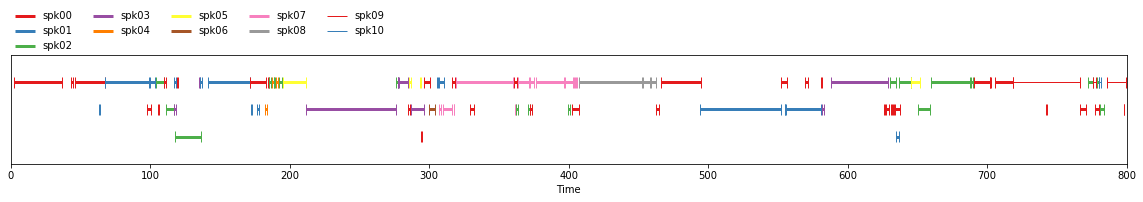

In [78]:
reference

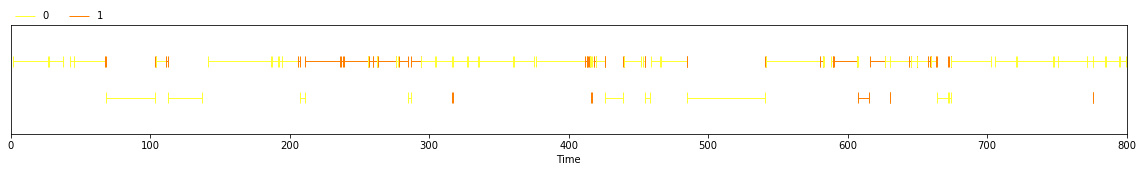

In [79]:
hypothesis_spectral

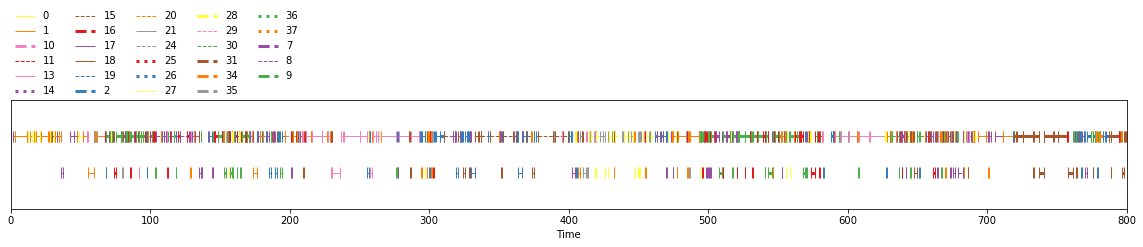

In [80]:
hypothesis_uisrnn

VoxConverse Test Set (UISRNN ICASSP2019)

--------------- rttm ----------------

DER = 56.1% JER = 65.1%
DER_conf = 49.6% DER_fa = 1.9% DER_md = 4.6%

Skip Overlap
DER = 54.9% JER = 63.6%
DER_conf = 50.5% DER_fa = 2.0% DER_md = 2.4%

--------------- rttm-collar ----------------

DER = 57.7% JER = 63.8%
DER_conf = 47.9% DER_fa = 5.9% DER_md = 3.9%

Skip Overlap
DER = 56.7% JER = 62.3%
DER_conf = 48.7% DER_fa = 6.2% DER_md = 1.9%

VoxConverse Test Set (Spectral Clustering ICASSP2018)

------------------- rttm ---------------------

DER = 41.5% JER = 82.1%
DER_conf = 35.0% DER_fa = 1.9% DER_md = 4.6%

Skip Overlap
DER = 40.5% JER = 81.5%
DER_conf = 36.0% DER_fa = 2.0% DER_md = 2.4%

--------------- rttm-collar ----------------

DER = 41.7% JER = 82.0%
DER_conf = 34.9% DER_fa = 3.0% DER_md = 3.7%

Skip Overlap
DER = 40.7% JER = 81.4%
DER_conf = 36.0% DER_fa = 3.2% DER_md = 1.6%

-------------- rttm-autotune ----------------

DER = 41.1% JER = 83.1%
DER_conf = 34.6% DER_fa = 1.9% DER_md = 4.6%

Skip Overlap
DER = 40.2% JER = 82.6%
DER_conf = 35.7% DER_fa = 2.0% DER_md = 2.4%

---------- rttm-collar-autotune -------------

DER = 41.2% JER = 83.0%
DER_conf = 34.6% DER_fa = 2.9% DER_md = 3.7%

Skip Overlap
DER = 40.3% JER = 82.6%
DER_conf = 35.7% DER_fa = 3.0% DER_md = 1.6%
